# Python Bytes reference authority

In [1]:
import bs4
import feedparser

In [4]:
url = 'https://pythonbytes.fm/rss'
feed = feedparser.parse(url)
# feed

## How many episodes?

In [5]:
entries = feed.get('entries')
print(f"There are {len(entries)} episodes.")

There are 156 episodes.


## What are the entries? Where are the links?

Format of desc is

```
<p>Sponsored by DigitalOcean:  <a href="https://pythonbytes.fm/digitalocean"><strong>pythonbytes.fm/digitalocean</strong></a></p>\n\n<p><strong>Special guests</strong>:</p>\n\n<ul>\n<li><strong><a href="https://twitter.com/dbader_org">Dan Bader</a></strong></li>\n<li><a href="https://twitter.com/cecilphillip"><strong>Cecil Philip</strong></a></li>\n</ul>\n\n<p><strong>Dan #1: Why You Should Use</strong> <code>python
```

In [8]:
descriptions = [e.get('description') for e in entries ]
print(f"First few desc:")
# print(descriptions[:3])

First few desc:


In [11]:
all_links = []

for desc in descriptions:
    soup = bs4.BeautifulSoup(desc, 'html.parser')
    links = [a['href'] for a in soup.findAll('a')]
    # print(links)
    all_links.extend(links)
    

print(f"There are {len(all_links)} total links")

There are 2799 total links


# Now grab the domains

In [15]:
from urllib.parse import urlparse
domains = [urlparse(url).netloc.replace('www.', '') for url in all_links]
print("The first 10 domains are")
print(domains[:10])


The first 10 domains are
['pythonbytes.fm', 'twitter.com', 'twitter.com', 'snarky.ca', 'pycoders.com', 'visualstudio.microsoft.com', 'reddit.com', 'lwn.net', 'pycoders.com', 'twitter.com']


## Now group by domain

In [31]:
import collections
counter = collections.Counter(domains)
common = counter.most_common()

top_25 = common[:25]
print(f"The top 25 are:" )
top_25

The top 25 are:


[('github.com', 442),
 ('twitter.com', 201),
 ('pythonbytes.fm', 141),
 ('youtube.com', 69),
 ('python.org', 66),
 ('medium.com', 53),
 ('reddit.com', 43),
 ('realpython.com', 39),
 ('talkpython.fm', 31),
 ('docs.python.org', 30),
 ('pypi.python.org', 30),
 ('testandcode.com', 26),
 ('training.talkpython.fm', 25),
 ('pypi.org', 23),
 ('hackernoon.com', 23),
 ('lwn.net', 21),
 ('en.wikipedia.org', 21),
 ('docs.pytest.org', 20),
 ('devguide.python.org', 20),
 ('do.co', 19),
 ('pythonforengineers.com', 18),
 ('pragprog.com', 15),
 ('arstechnica.com', 15),
 ('rollbar.com', 15),
 ('opensource.com', 14)]

## Now let's see it!

In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

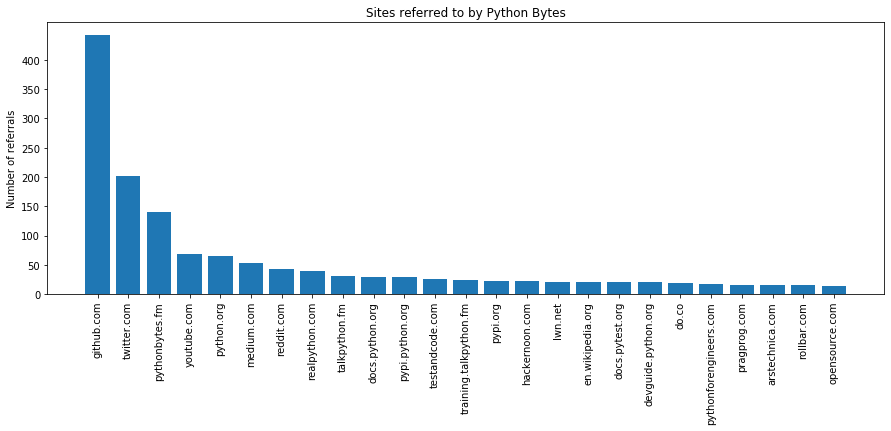

In [33]:
plt.rcParams["figure.figsize"] = (15,5)

values = [t[1] for t in top_25]
value_bins = [t[0] for t in top_25 ]

ind = list(range(1, len(values)+1))    # the x locations for the groups
width = 0.40       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, menMeans, width)
p1 = plt.bar(ind, values, width*2)

plt.ylabel('Number of referrals')
plt.title('Sites referred to by Python Bytes')
plt.xticks(ind, value_bins, rotation='vertical')
plt.yticks(np.arange(0, max(values), 50))
plt.width = 500


